In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt
import os

In [2]:
data = pd.read_csv("./dataset/new/data.csv")

In [3]:
labels = pd.read_csv("./dataset/new/labels.csv")

In [4]:
data.drop(columns="Unnamed: 0", inplace=True)

# Task 3

Feature characteristics: How are the features distributed? Are there any pairs or
subsets of features that seem highly correlated or redundant?


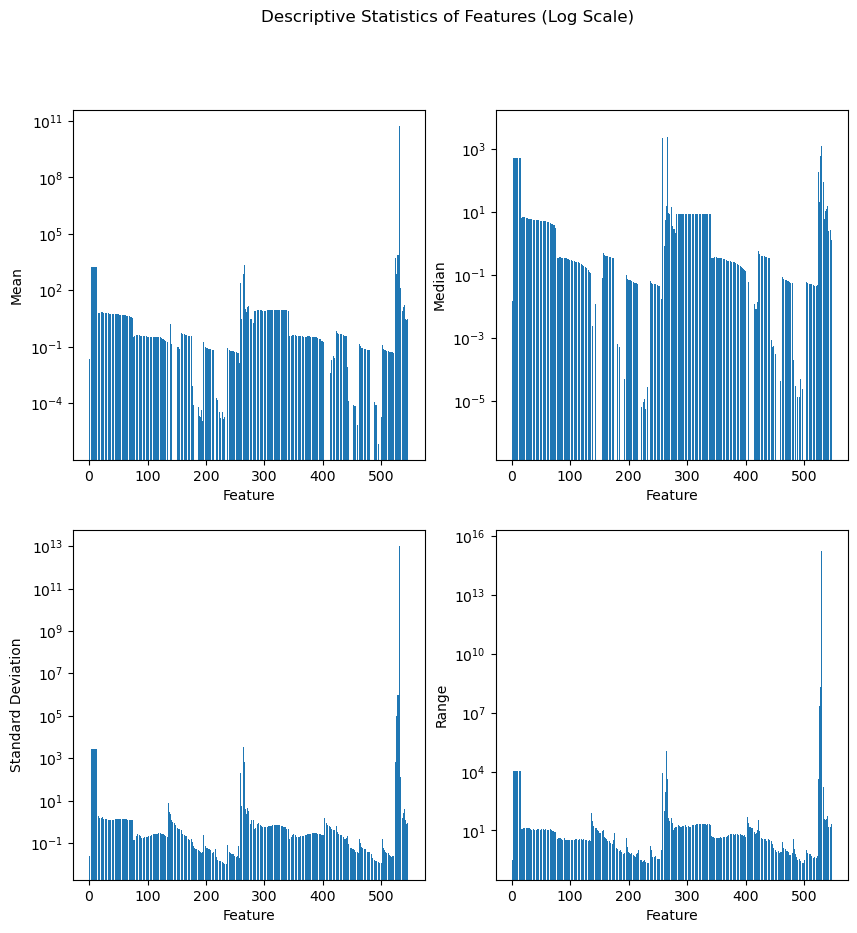

In [5]:
# calculate the descriptive statistics for each feature
stats = data.describe().T[['mean', '50%', 'std', 'min', 'max']]
stats['range'] = stats['max'] - stats['min']

# create a 2x2 plot grid for the four statistics
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

range_stats = np.arange(len(stats.to_numpy()))

# plot the mean in the top left subplot
ax[0, 0].bar(range_stats, stats['mean'])
ax[0, 0].set_xlabel("Feature")
ax[0, 0].set_ylabel("Mean")
ax[0, 0].set_yscale('log')

# plot the median in the top right subplot
ax[0, 1].bar(range_stats, stats['50%'])
ax[0, 1].set_xlabel("Feature")
ax[0, 1].set_ylabel("Median")
ax[0, 1].set_yscale('log')

# plot the standard deviation in the bottom left subplot
ax[1, 0].bar(range_stats, stats['std'])
ax[1, 0].set_xlabel("Feature")
ax[1, 0].set_ylabel("Standard Deviation")
ax[1, 0].set_yscale('log')

# plot the range in the bottom right subplot
ax[1, 1].bar(range_stats, stats['range'])
ax[1, 1].set_xlabel("Feature")
ax[1, 1].set_ylabel("Range")
ax[1, 1].set_yscale('log')

# set the title of the overall plot
fig.suptitle("Descriptive Statistics of Features (Log Scale)")

# show the plot
plt.show()

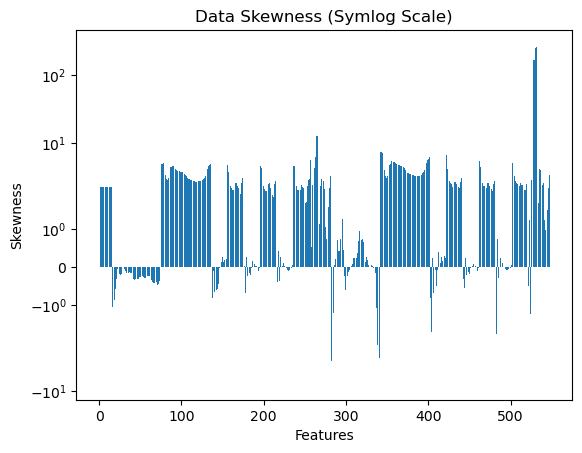

In [6]:
# Visualizing Skewness of Data to see which features have more outliers (uneven probability density function)
# High skewness means uneven distribution
skewness=data.skew()
skew_columns=skewness.to_numpy()

# create a bar plot
fig, ax = plt.subplots()
ax.bar(np.arange(len(skew_columns)), skewness)

plt.title("Data Skewness (Symlog Scale)")
plt.xlabel("Features")
plt.ylabel("Skewness")
ax.set_yscale('symlog')

In [7]:
# compute the pairwise correlation coefficients between all pairs of features
corr_coef = data.corr()

# create a mask to remove the upper triangular part of the correlation matrix
mask = np.triu(np.ones_like(corr_coef, dtype=bool)).astype(bool)

# set the diagonal to False to remove self-correlations
np.fill_diagonal(mask, False)

# get the indices of the highly correlated features (with correlation coefficient > 0.9)
high_corr_indices = np.where((np.abs(corr_coef) > 0.9) & mask)

# get the indices of very weakly correlated features (redundant) (with correlation coefficient < 0.01)
redundant_indices = np.where((np.abs(corr_coef) < 0.01) & mask)

Text(0.5, 1.0, 'Highly Correlated Pairs')

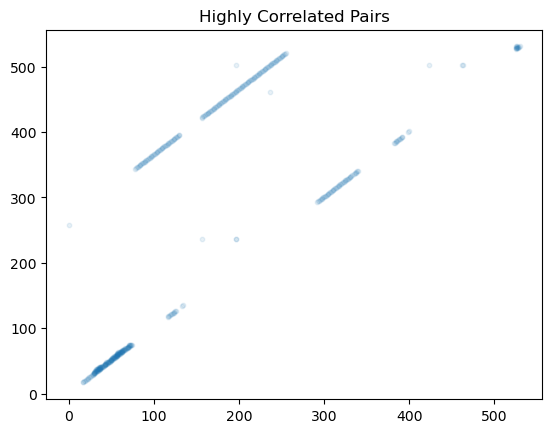

In [8]:
# plot the scatter plots for highly correlated features
plt.scatter(high_corr_indices[0], high_corr_indices[1], s=10, alpha=0.1)
plt.title("Highly Correlated Pairs")

# Task 4

Feature/Label agreement: Which features seem useful for classification? Which
ones are correlated with the labels?

In [9]:
from sklearn.feature_selection import mutual_info_classif

# Use mutual info method to get scores between real valued features and categorical labels
# The mutual information method measures the amount of information obtained from one variable about another variable.
# It measures the dependence between two variables by calculating the reduction in uncertainty 
# of one variable when the other variable is known.

In [10]:
# Create a function to visualize the mutual info scores for each feature
def create_mutual_vis(mutual_info):   
    # create a bar plot of mutual information scores
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(np.arange(len(mutual_info)), mutual_info)
    ax.set_title('Mutual Information Scores')
    ax.set_ylabel('Score')
    plt.xlabel('Features')
    plt.show()

In [ ]:
mutual_info = mutual_info_classif(data, labels["Aggregated"])

In [ ]:
create_mutual_vis(mutual_info)

In [ ]:
# Create binary labels instead of 0 ,1 ,2 .. to represent whether a bird exist or not to compute correlation
# between features and binary categorical labels later in this notebook
# Because correlation is only a linear relationship so it can't be used with the previous multi class labels
labels_binary = labels
labels_binary.loc[labels_binary["Aggregated"] != 0, "Aggregated"] = 1
labels_binary = labels_binary["Aggregated"]

In [ ]:
# Again see/check whether the same features have high scores or not for whether a bird exists
mutual_info_binary = mutual_info_classif(data, labels_binary)

In [ ]:
create_mutual_vis(mutual_info_binary)

In [ ]:
# Compute the Pearson correlation between data and labels_binary (which states whether a bird exists or not -binary)
# Since we can not compute it for all classes as this would be categorical label column which doesn't work with correlation
corr_coef_binary = data.corrwith(labels_binary, method='pearson')

In [ ]:
# plot the scatter plots for highly correlated features with the labels_binary
# Create a bar chart
plt.bar(np.arange(len(corr_coef_binary)), abs(corr_coef_binary))

# Add labels and title
plt.xlabel("Features")
plt.ylabel("Correlation Coef.")
plt.title("Absolute Correlation Features x Binary Labels (Birds Exist?)")